In [1]:
using Pkg, Revise
Pkg.activate("../GenLinAlgProblems")
using GenLinAlgProblems, LinearAlgebra, RowEchelon, Latexify, SymPy, Random

#using PyCall
#itikz = pyimport("itikz")
#nM    = pyimport("itikz.nicematrix")  #defined in GenLinAlgProblems module

Random.seed!(113312);

  Activating project at `C:\Users\jeff\NOTEBOOKS\elementary-linear-algebra\GenLinAlgProblems`


# 1. GE Problems

## 1.1 GE and GJ Problem with Layout

A X = B


L"\begin{equation}
\left[
\begin{array}{cccc}
\left[
\begin{array}{cccccc}
1 & -2 & 2 & -2 & 1 & 5 \\
0 & 0 & -1 & 2 & -1 & -2 \\
2 & -4 & 6 & -8 & 4 & 14 \\
\end{array}
\right] & \left[
\begin{array}{cc}
-1 & 1 \\
0 & 0 \\
-1 & 2 \\
0 & 0 \\
0 & 0 \\
0 & 0 \\
\end{array}
\right] & =  & \left[
\begin{array}{cc}
-3 & 5 \\
1 & -2 \\
-8 & 14 \\
\end{array}
\right] \\
\end{array}
\right]
\end{equation}
"

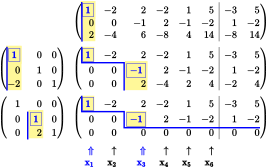

In [2]:
A,X,B = gen_gj_pb(3,6,2; maxint=2, pivot_in_first_col=true, num_rhs=2,has_zeros=false)
matrices, pivot_cols, desc =reduce_to_ref( [A B]; n=size(A,2), gj=false )
println("A X = B")
display(latexify( [A', X', latex("= "), B']' ))

ge( matrices, desc, pivot_cols; Nrhs=2, tmp_dir="../tmp" )

In [3]:
println("pivot cols:  $pivot_cols \n" )

pivot cols:  [1, 3] 



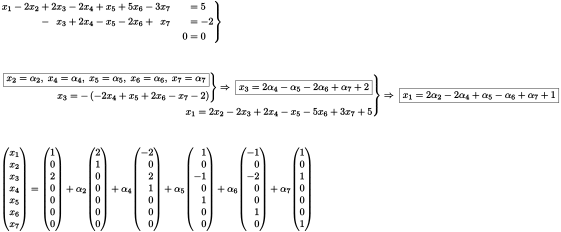

In [4]:
show_solution(matrices; tmp_dir="../tmp" )

In [5]:
println()
R,RHS = split_R_RHS( matrices[end][end], size(B,2) )

#println( "Particular Solution, aka X")
#X_p = particular_solution( RB, size(B,2), pivot_cols) 

H = homogeneous_solutions( R, pivot_cols )
println("Homogeneous Solutions: "); latexify(H)


Homogeneous Solutions: 


L"\begin{equation}
\left[
\begin{array}{cccc}
2 & 2 & -1 & -5 \\
1 & 0 & 0 & 0 \\
0 & -2 & 1 & 2 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
\end{array}
\right]
\end{equation}
"

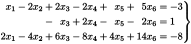

In [6]:
# The following require the RREF problem (i.e., GJ, not GE)
cascade = nM.BacksubstitutionCascade.from_ref_Ab(Int.([R RHS[:,1]]) )
cascade.show(A,B[:,1], show_system=true, show_cascade=false)

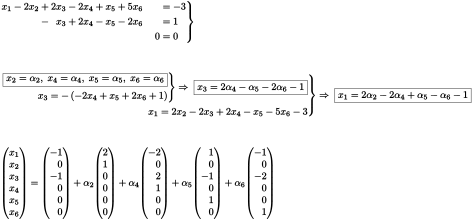

In [7]:
cascade.show( show_system=true, show_cascade=true, show_solution=true)

## 1.2 GE with a Complex Matrix

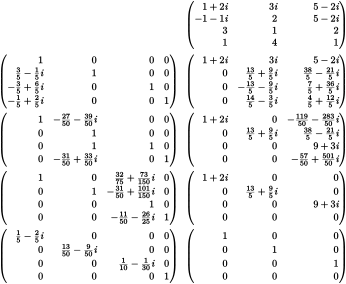

In [8]:
A=[1+2im 3im  5-2im; -1-1im 2 5-2im; 3 1 2; 1 4 1 ]
matrices,pivot_indices,desc = reduce_to_ref(A, gj=true)
h,m=nM.ge(to_latex(matrices), formater=x->x, Nrhs=0, tmp_dir="../tmp" )
h

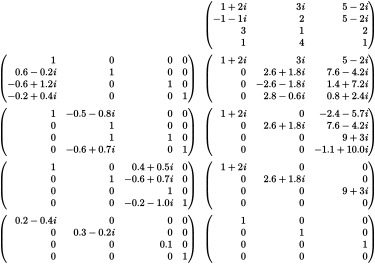

In [9]:
matrices=round_matrices( matrices, 1)
h,m=nM.ge(to_latex(matrices), formater=x->x, Nrhs=0 )
h

## 1.3 Inverse Problem with Layout

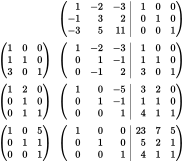

In [10]:
A, A_inv                = gen_inv_pb(3, maxint=3)
matrices, pivot_cols, _ = reduce_to_ref( Rational{Int64}.([A 1I]), gj=true)

h,m=nM.ge( to_latex(matrices), formater=x->x, Nrhs=size(A,1), tmp_dir="../tmp" )
h

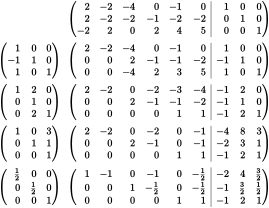

In [11]:
A,_,_ = gen_gj_pb(3,6,3; maxint=2, pivot_in_first_col=true, num_rhs=0,has_zeros=false)

matrices, pivot_cols, _  = reduce_to_ref( Rational{Int64}.([A 1I]), gj=true)

h,m=nM.ge( to_latex(matrices), formater=x->x, Nrhs=size(A,1), tmp_dir="../tmp" )
h

In [12]:
println("The first #rank columns of E inverse are the pivot cols of the matrix")
display(latexify(Int64.(inv((matrices[end][end])[:,end-2:end]))))
println("it also contains the switching matrix in its rows:")
display(latexify(Int64.(inv((matrices[end][end])[:,end-2:end]) *matrices[end][end][:,1:6])))
println("We can factor it out of E and obtain C M R")

The first #rank columns of E inverse are the pivot cols of the matrix


L"\begin{equation}
\left[
\begin{array}{ccc}
2 & -4 & -1 \\
2 & -2 & -2 \\
-2 & 0 & 4 \\
\end{array}
\right]
\end{equation}
"

it also contains the switching matrix in its rows:


L"\begin{equation}
\left[
\begin{array}{cccccc}
2 & -2 & -4 & 0 & -1 & 0 \\
2 & -2 & -2 & -1 & -2 & -2 \\
-2 & 2 & 0 & 2 & 4 & 5 \\
\end{array}
\right]
\end{equation}
"

We can factor it out of E and obtain C M R


## 1.3 PLU Problem

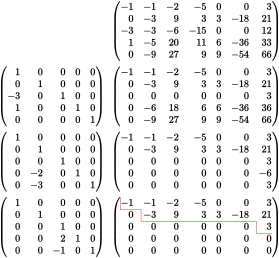

In [13]:
pivot_cols, L,U, A = gen_lu_pb(5,7,3, maxint=3)
matrices,_,_  = reduce_to_ref( A )

pivot_locs    = [(i-1,Int64(pivot_cols[i]-1)) for i in eachindex(pivot_cols)]
ref_path_list = [ [length(matrices)-1, 1, pivot_locs, "vh","red"] ]

h,m = nM.ge(to_latex(matrices), formater=x->x,
            ref_path_list = ref_path_list, tmp_dir="../tmp")
h

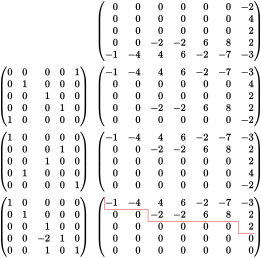

In [14]:
pivot_cols,P,L,U,A=gen_plu_pb(5,7,3)
matrices,_,_  = reduce_to_ref( A )

pivot_locs    = [(i-1,Int64(pivot_cols[i]-1)) for i in eachindex(pivot_cols)]
ref_path_list = [ [length(matrices)-1, 1, pivot_locs, "vh","red"] ]

h,m = nM.ge(to_latex(matrices), formater=x->x,
            ref_path_list = ref_path_list, tmp_dir="../tmp")
h

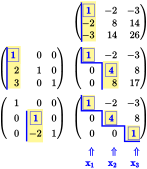

In [15]:
L,D,A=gen_ldlt_pb(3; rank=3, squares=true)
matrices, pivot_cols, desc = reduce_to_ref( A; n=4, gj=false );
ge( matrices, desc, pivot_cols; Nrhs=0, tmp_dir="../tmp" )

## 1.3 Julia Wrapper Class for ge()

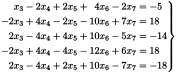

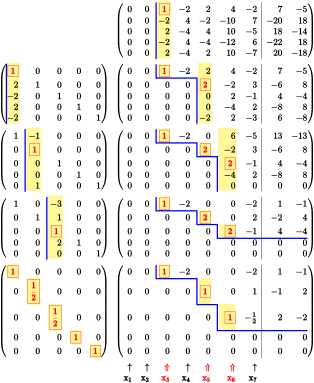

In [16]:
Random.seed!(42213);
A,X,B = gen_gj_pb(5,7,3; maxint=2, pivot_in_first_col=false, num_rhs=2,has_zeros=false)
pb = ShowGe{Rational{Int}}( A,  B, tmp_dir="../../tmp")
display( show_system( pb, b_col=2 ) )
ref!(pb, gj=true)
show_layout!(pb)

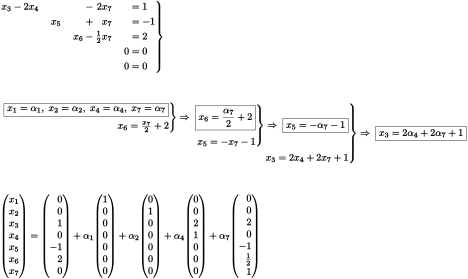

In [17]:
show_backsubstitution!(pb, b_col=1)

# 2 Normal Equation Problems

## 2.1 Solve the Normal Equation

In [18]:
A = gen_full_col_rank_matrix( (1,1,2),3; maxint=2 )
_,b = gen_rhs( A, 1:3 )
P = ca_projection_matrix( A )
d,Pint = factor_out_denominator( P )
println("Given matrix A = ")
display(latexify(A))
println("The orthogonal projection matrix into the column space of A is given by")
latexify([1//d, Pint']')

Given matrix A = 


L"\begin{equation}
\left[
\begin{array}{ccc}
-1 & 4 & 2 \\
1 & -2 & 0 \\
-1 & 0 & 0 \\
-1 & 0 & 2 \\
\end{array}
\right]
\end{equation}
"

The orthogonal projection matrix into the column space of A is given by


L"\begin{equation}
\left[
\begin{array}{cc}
\frac{1}{10} & \left[
\begin{array}{cccc}
9 & -2 & -2 & 1 \\
-2 & 6 & -4 & 2 \\
-2 & -4 & 6 & 2 \\
1 & 2 & 2 & 9 \\
\end{array}
\right] \\
\end{array}
\right]
\end{equation}
"

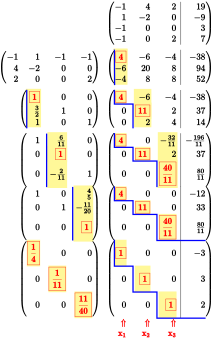

In [19]:
pb = ShowGe{Rational{Int}}( A,  b, tmp_dir="../../tmp")
ref!(pb, gj=true, normal_eq=true)
show_layout!(pb)

# 3. QR Problems

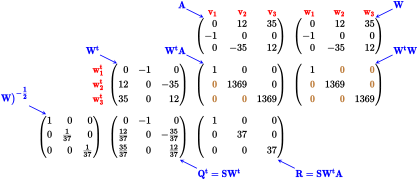

In [20]:
A   = gen_qr_problem_3(maxint=1)
W   = gram_schmidt_w(A)
h,m = nM.gram_schmidt_qr(A, W, tmp_dir="../tmp")
h

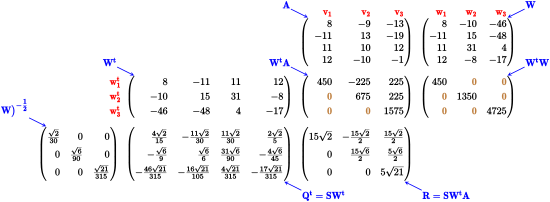

In [21]:
A   = gen_qr_problem_4(maxint=1)[:,shuffle(2:4)]
W   = gram_schmidt_w(A)
h,m = nM.gram_schmidt_qr(A, W, fig_scale=1, tmp_dir="../tmp")
h

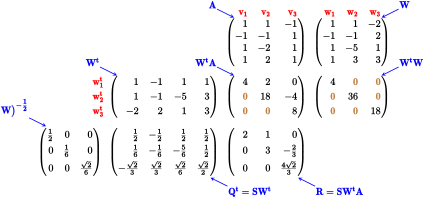

In [22]:
A=[ 1  1 -1
   -1 -1  1
    1 -2  1
    1  2  1
]
W   = gram_schmidt_w(A)
h,m = nM.gram_schmidt_qr(A, W, tmp_dir="../tmp")
h

# 4. Eigenproblems

## 4.1 Eigenproblem for a Square Matrix

L"\begin{equation}
\left[
\begin{array}{ccc}
22 & 9 & -3 \\
-21 & -8 & 3 \\
77 & 33 & -10 \\
\end{array}
\right]
\end{equation}
"

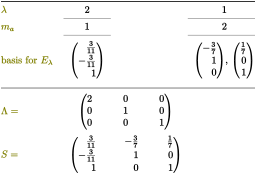

In [23]:
S,Λ,Sinv,A=gen_eigenproblem([1,1,2])
display(latexify(A))
nM.show_eig_tbl(A,fig_scale=1, mmLambda=11, color="Olive", tmp_dir="../tmp" )

## 4.2 Eigenproblem for a Symmetrix Matrix

In [24]:
S,Λ,A=gen_symmetric_eigenproblem([2,2,3,0], maxint=2)

d,A_=factor_out_denominator(A)
display(latexify([1//d,A_']'))
#nM.show_eig_tbl(A_,Ascale=d,normal=true, fig_scale=1, mmLambda=11, color="blue" )

L"\begin{equation}
\left[
\begin{array}{cc}
\frac{1}{175} & \left[
\begin{array}{cccc}
342 & -72 & 36 & -84 \\
-72 & 102 & 24 & -156 \\
36 & 24 & 413 & -72 \\
-84 & -156 & -72 & 368 \\
\end{array}
\right] \\
\end{array}
\right]
\end{equation}
"

L"\begin{equation}
\left[
\begin{array}{c}
\left[
\begin{array}{ccc}
5 & 6 & -5 \\
0 & 8 & -4 \\
5 & 14 & -9 \\
\end{array}
\right] \\
\left[
\begin{array}{ccc}
1 & 0 & \frac{-1}{3} \\
0 & 1 & \frac{-2}{3} \\
0 & 0 & 0 \\
\end{array}
\right] \\
\end{array}
\right]
\end{equation}
"

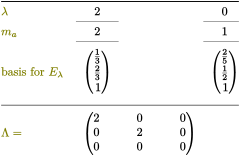

In [25]:
A=Rational{Int64}.(gen_non_diagonalizable_eigenproblem(2,0))
display(latexify([ A, rref(A-2I)] ))
nM.show_eig_tbl(Int.(A),fig_scale=1.2, mmLambda=11, color="Olive", tmp_dir="../tmp" )

## 4.3 SVD

"\\begin{equation}\n\\left[\n\\begin{array}{ccccc}\n\\frac{1}{5} & \\left[\n\\begin{array}{ccccc}\n0 & 0 & -8 & 0 & 0 \\\\\n0 & 0 & -6 & 0 & 0 \\\\\n10 & 0 & 0 & 0 & 0 \\\\\n\\end{array}\n\\right] & \\left[\n\\begin{array}{ccc}\n0 & \\frac{4}{5} & \\frac{3}{5} \\\\\n0 & \\frac{3}{5} & \\frac{-4}{5} \\\\\n1 &" ⋯ 108 bytes ⋯ "& 0 & 0 & 0 \\\\\n\\end{array}\n\\right] & \\left[\n\\begin{array}{ccccc}\n1 & 0 & 0 & 0 & 0 \\\\\n0 & 0 & -1 & 0 & 0 \\\\\n0 & 0 & 0 & 0 & 1 \\\\\n0 & \\frac{3}{5} & 0 & \\frac{-4}{5} & 0 \\\\\n0 & \\frac{4}{5} & 0 & \\frac{3}{5} & 0 \\\\\n\\end{array}\n\\right] \\\\\n\\end{array}\n\\right]\n\\end{equation}\n"

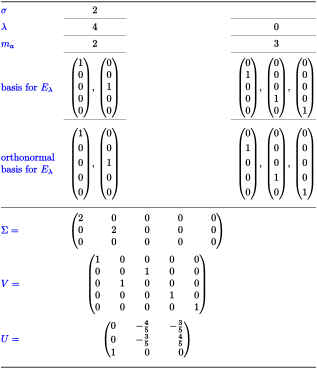

In [26]:
U,Σ,Vt,A = gen_svd_problem(3,[3,2],  [2,2],  maxint=2)

d,intA=factor_out_denominator(A)
display( latexify([1//d,intA',U',Σ',Vt']'))
nM.show_svd_table(intA, Ascale=d, mmS=7, mmLambda=10, tmp_dir="../tmp")

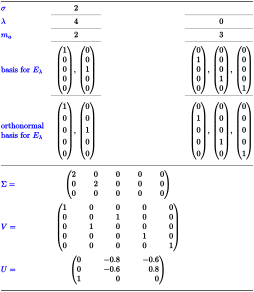

In [27]:
nM.show_svd_table(intA, Ascale=d, eig_digits=0, sigma_digits=0, vec_digits=3, fig_scale=0.8, tmp_dir="../tmp")

Note that if we work with real numbers, numerical errors yield a result looking quite different:<br>$\qquad$
the algebraic multiplicities are different due to roundoff.

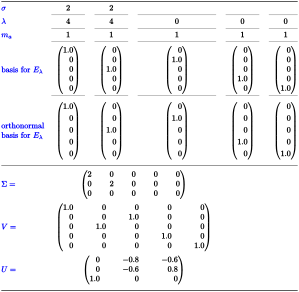

In [28]:
nM.show_svd_table(A, Ascale=1.0, eig_digits=0, sigma_digits=0, vec_digits=3, fig_scale=0.8, tmp_dir="../tmp")

In [29]:
table=nM.svd_tbl(A)
table.eig

Dict{Any, Any} with 6 entries:
  "sigma"  => PyObject[PyObject 2.00000000000000, PyObject 2.00000000000000, Py…
  "evecs"  => PyObject[PyObject Matrix([…
  "uvecs"  => PyObject[PyObject Matrix([…
  "qvecs"  => PyObject[PyObject Matrix([…
  "ma"     => [1, 1, 1, 1, 1]
  "lambda" => PyObject[PyObject 4.00000000000000, PyObject 4.00000000000000, Py…

In [30]:
#A=svd_problem(4,[2,3],[2,1,1])
sol=svd(intA)
display("U =");display(round.(sol.U, digits=3))
display("singular values =");display(round.(sol.S, digits=3))
display("Vt =");display(round.(sol.Vt, digits=3))

"U ="

3×3 Matrix{Float64}:
 0.0  -0.8  -0.6
 0.0  -0.6   0.8
 1.0   0.0   0.0

"singular values ="

3-element Vector{Float64}:
 10.0
 10.0
  0.0

"Vt ="

3×5 Matrix{Float64}:
 1.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0

# Quick Tests

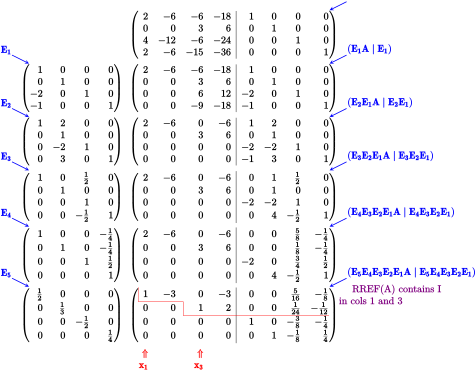

In [31]:
A = [
 2   -6   -6  -18
 0    0    3    6
 4  -12   -6  -24
 2   -6  -15  -36]
matrices, pivot_indices,_ = reduce_to_ref(Rational{Int64}.([A I]), gj=true)
pivot_locs = [(i-1,Int64(pivot_indices[i]-1)) for i in eachindex(pivot_indices[1:2])]

h,m = nM.ge(to_latex(matrices), formater=x->x, Nrhs=size(A,1), tmp_dir="../tmp",
           ref_path_list =  [ [length(matrices)-1, 1, pivot_locs, "vh","red"] ],
           comment_list=["","", "", "", "", raw"""RREF(A)  contains I\\
                                                  \ \     in cols 1 and 3"""],
           array_names = [ "E", ["A", "I"]],
           variable_summary = [true, :none, true, :none]
)
h

In [32]:
S= [1 0 0; 0 1  0; 1 1 1]
Sinv = Int.(round.(inv(S)))
A = S * diagm( [2, 1, 0]) * Sinv

3×3 Matrix{Int64}:
 2  0  0
 0  1  0
 2  1  0

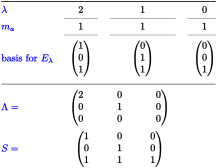

In [33]:
d,intA=factor_out_denominator(A)
nM.show_eig_tbl(intA, Ascale=d, mmLambda=12, tmp_dir="../tmp")

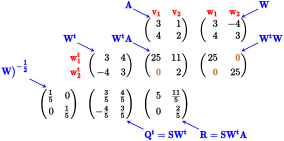

In [34]:
A=[ 3 1; 4 2]
W   = gram_schmidt_w(A)
h,m = nM.gram_schmidt_qr(A, W, tmp_dir="../tmp")
h

In [35]:
A=[ 3 0 0 0; 0 3 0 0; 0 0 3 3; 0 0 3 3]
eigen(A)

Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}
values:
4-element Vector{Float64}:
 3.552713678800501e-15
 3.0
 3.0
 6.0
vectors:
4×4 Matrix{Float64}:
  0.0       0.0  1.0  0.0
  0.0       1.0  0.0  0.0
  0.707107  0.0  0.0  0.707107
 -0.707107  0.0  0.0  0.707107

# Live Demos

In [36]:
A =  gen_full_col_rank_matrix( (1,1,2),3; maxint=1 )
_,A = factor_out_denominator( A )
A=Rational{Int}.(A)
b = rand(-3:3, size(A,1))

P = ca_projection_matrix( A )
d,Pint = factor_out_denominator( P )
println("Given matrix A, and vector b")
display(latexify([A', b']'))
println("The orthogonal projection matrix into the column space of A is given by")
latexify([1//d, Pint']')

b_parallel = P*b
b_perp = b - b_parallel

println("b_parallel and b_perp =")
display(latexify([b_parallel', b_perp']'))
@show b_parallel ⋅ b_perp == 0;

Given matrix A, and vector b


L"\begin{equation}
\left[
\begin{array}{cc}
\left[
\begin{array}{ccc}
0 & -5 & 5 \\
0 & -5 & 0 \\
7 & 0 & -3 \\
-1 & 0 & 4 \\
\end{array}
\right] & \left[
\begin{array}{c}
-3 \\
-1 \\
-1 \\
-1 \\
\end{array}
\right] \\
\end{array}
\right]
\end{equation}
"

The orthogonal projection matrix into the column space of A is given by
b_parallel and b_perp =


L"\begin{equation}
\left[
\begin{array}{cc}
\left[
\begin{array}{c}
\frac{-29}{10} \\
\frac{-11}{10} \\
\frac{-51}{50} \\
\frac{-57}{50} \\
\end{array}
\right] & \left[
\begin{array}{c}
\frac{-1}{10} \\
\frac{1}{10} \\
\frac{1}{50} \\
\frac{7}{50} \\
\end{array}
\right] \\
\end{array}
\right]
\end{equation}
"

b_parallel ⋅ b_perp == 0 = true


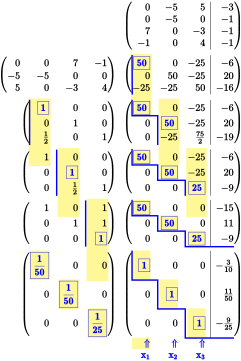

In [37]:
matrices,pivot_cols,desc = normal_eq_reduce_to_ref([A b]; n=size(A,2), gj=true)

ge( matrices, desc, pivot_cols; Nrhs=1, tmp_dir="../tmp" )

In [38]:
x          = matrices[end][end][:,end]
b_parallel = A*x
b_perp     = b - b_parallel

println("Original b and b_parallel")
display(latexify( [b', round.(Float64.(b_parallel), digits=3)']'))

println("b_parallel and b_perp")
display(latexify( [b_parallel', b_perp']'))
@show b_parallel ⋅ b_perp == 0;

Original b and b_parallel


L"\begin{equation}
\left[
\begin{array}{cc}
\left[
\begin{array}{c}
-3 \\
-1 \\
-1 \\
-1 \\
\end{array}
\right] & \left[
\begin{array}{c}
-2.9 \\
-1.1 \\
-1.02 \\
-1.14 \\
\end{array}
\right] \\
\end{array}
\right]
\end{equation}
"

b_parallel and b_perp


L"\begin{equation}
\left[
\begin{array}{cc}
\left[
\begin{array}{c}
\frac{-29}{10} \\
\frac{-11}{10} \\
\frac{-51}{50} \\
\frac{-57}{50} \\
\end{array}
\right] & \left[
\begin{array}{c}
\frac{-1}{10} \\
\frac{1}{10} \\
\frac{1}{50} \\
\frac{7}{50} \\
\end{array}
\right] \\
\end{array}
\right]
\end{equation}
"

b_parallel ⋅ b_perp == 0 = true


In [39]:
Random.seed!(1112);
U,Σ,Vt,A = gen_svd_problem(5,4,  [2,3,0,0],  maxint=1)

d,intA=factor_out_denominator(A)
display( latexify([1//d,intA',U',Σ',Vt']'))

"\\begin{equation}\n\\left[\n\\begin{array}{ccccc}\n\\frac{1}{2} & \\left[\n\\begin{array}{cccc}\n0 & 3 & 0 & 0 \\\\\n0 & -3 & 0 & 0 \\\\\n0 & -3 & 0 & 0 \\\\\n0 & -3 & 0 & 0 \\\\\n0 & 0 & 0 & -4 \\\\\n\\end{array}\n\\right] & \\left[\n\\begin{array}{ccccc}\n0 & \\frac{-1}{2} & \\frac{1}{2} & \\frac{1}{2} &" ⋯ 267 bytes ⋯ "{cccc}\n2 & 0 & 0 & 0 \\\\\n0 & 3 & 0 & 0 \\\\\n0 & 0 & 0 & 0 \\\\\n0 & 0 & 0 & 0 \\\\\n0 & 0 & 0 & 0 \\\\\n\\end{array}\n\\right] & \\left[\n\\begin{array}{cccc}\n0 & 0 & 0 & -1 \\\\\n0 & -1 & 0 & 0 \\\\\n1 & 0 & 0 & 0 \\\\\n0 & 0 & -1 & 0 \\\\\n\\end{array}\n\\right] \\\\\n\\end{array}\n\\right]\n\\end{equation}\n"

In [40]:
round.(pinv(intA//d), digits=3)

4×5 Matrix{Float64}:
 0.0     0.0     0.0     0.0     0.0
 0.167  -0.167  -0.167  -0.167   0.0
 0.0     0.0     0.0     0.0     0.0
 0.0     0.0     0.0     0.0    -0.5

In [41]:
b = A'A*[3;1;1;-3]

4-element Vector{Rational{Int64}}:
   0
   9
   0
 -12

In [42]:
b+[1;0;-1;0]

4-element Vector{Rational{Int64}}:
   1
   9
  -1
 -12

In [43]:
b=A*[1;1;2;2]+[0;1;0;0;-1]

5-element Vector{Rational{Int64}}:
  3//2
 -1//2
 -3//2
 -3//2
  -5

In [44]:
print(latexify(b))

\begin{equation}
\left[
\begin{array}{c}
\frac{3}{2} \\
\frac{-1}{2} \\
\frac{-3}{2} \\
\frac{-3}{2} \\
-5 \\
\end{array}
\right]
\end{equation}


In [45]:
print(A)

Rational{Int64}[0 3//2 0 0; 0 -3//2 0 0; 0 -3//2 0 0; 0 -3//2 0 0; 0 0 0 -2]